**Clusteranalyse: Mall costumer Segmentation Daten**





---



Sitzung 7


Im Folgenden werden wir mithilfe des K-Means Algorithmus Kunden-Cluster auf Basis des "Mall costumer" Datensatzes erstellen.

Der Mall Customer Datensatz stammt von: Vijay Choudhary, kaggle Contributor

Den Original-Code findet Ihr hier: https://towardsdatascience.com/customer-segmentation-using-k-means-clustering-d33964f238c3

Code-Beispiele stammen außerdem von folgenden Seiten:
https://www.kaggle.com/naren3256/kmeans-clustering-and-cluster-visualization-in-3d
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.values.html
https://www.w3resource.com/pandas/dataframe/dataframe-values.php


Ziel ist es, die Kunden in Gruppen einzuteilen und auf Basis der jeweils ähnlichen Eigenschaften
- Preispolitik
- Marketing-Kampagnen,
- Vertriebspolitik,
- Produkentwicklung

zu gestalten bzw. zu optimieren.

Zunächst importieren wir die benötigten Packages und den Datensatz.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSRaMVdrmnaVULTVwjWYG0A__p_e_0ZOH8ciJPEfVl6bjfbp800kA8zkcUPHhuyvbHB5BSNFOZ6h-j0/pub?output=csv")

Wir beginnen damit, uns die ersten Zeilen des Datensatzes anzeigen zu lassen.

Mit der .head() Funktion von pandas kann man sich die obersten Werte eines durch pandas erstellten DataFrames ansehen. Dies hilft dabei, einen ersten Überblick über die Werte zu bekommen. Die Anzahl der angezeigten Reihen kann durch den Wert in der Klammer bestimmt werden. Merke: in Python startet der erste Wert bei 0, nicht 1!


In [2]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Zusätzlich zu einem Überblick über die eingetragenen Werte sollten wir uns jetzt noch die Datentypen anzeigen lassen. Wir erinnern uns: Modelle im Bereich maschinelles Lernen benötigen Zahlen, um Modelle aufstellen zu können.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Zu einer vollständigen Datenanalyse gehört auch die Vorbereitung und Bereinigung von Datensätzen. Dies ist jedoch kein zentraler Bestandteil des Kurses. Der Datensatz ist bereits bereinigt, allerdings sollten wir trotzdem kurz einen Blick auf fehlende Werte werfen. Hierzu lassen wir uns die Summe der fehlenden Werte mit folgendem Code anzeigen. Hierbei bezieht sich die Funktion .isnull() auf das Dataframe und zählt die fehlenden Werte. Mit der .sum() Funktion summieren wir diese für jede Variable in unserem Dataframe:

In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Anschließend betrachten wir die deskriptiven Statistiken. Wichtig ist, zu beachten, dass die Angaben zu den Ausgaben in einer Punktskala erfolgen, die vom Ersteller des Datensatzes auf Basis von  Verhaltens- und Konsumdaten selbst generiert wurde.

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Die Variable "CostumerID" ist nicht relevant für die Analyse. Daher löschen wir sie aus dem Datensatz.
Anschließend erstellen wir ein Violin-Plot zur Altersverteilung der Kund*innen.

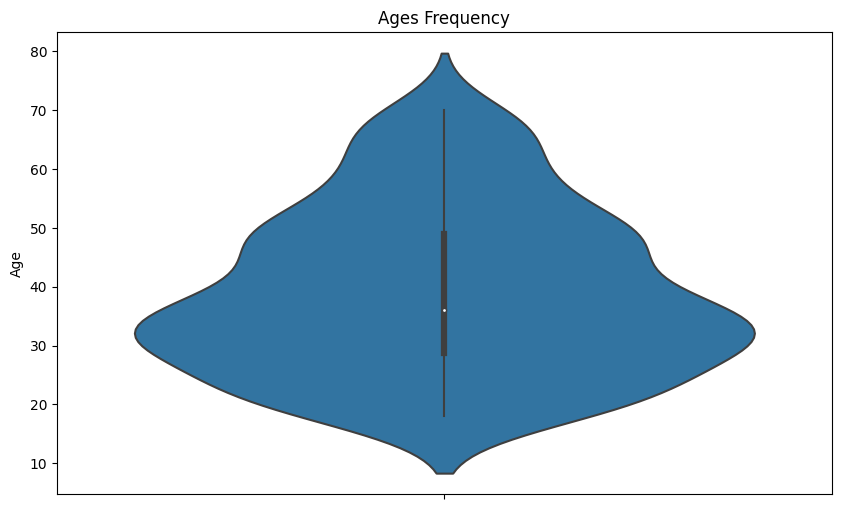

In [6]:
df.drop(["CustomerID"], axis = 1, inplace=True)

plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Age"])
plt.show()

Die Altersverteilung betrachten wir anhand eines Säulendiagramms auf Basis von Altersklassen.

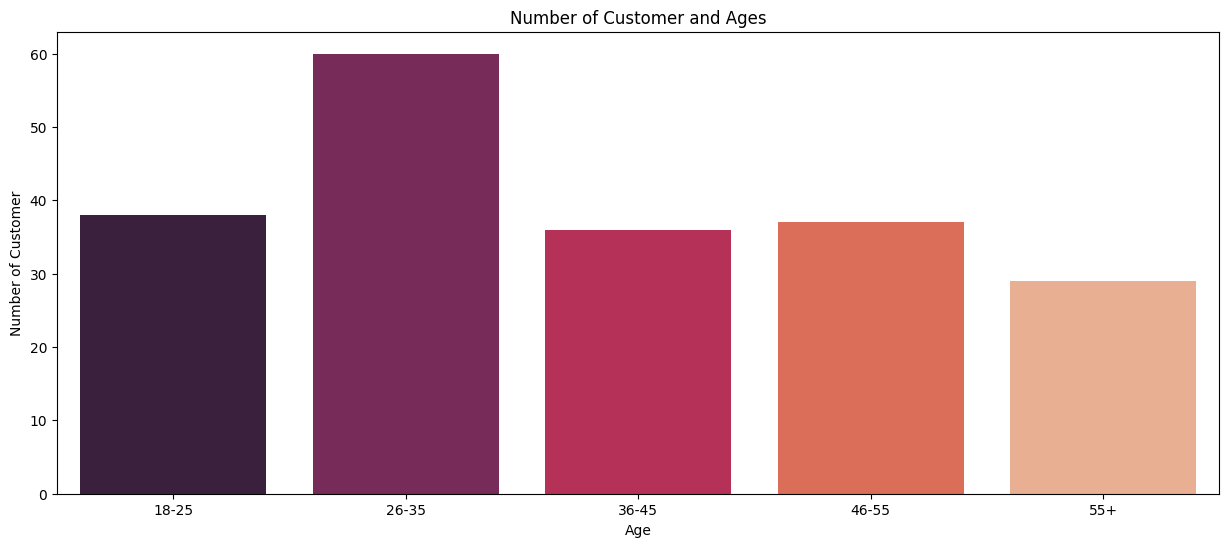

In [7]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

Neben dem Alter der Kunden enthält unser Datensatz die Variablen/Features Spending Score und Einkommen, die wir nun genauer betrachten wollen. In den zwei nachfolgenden Boxplots betrachten wir die Verteilung von durchschnittlichen Ausgaben und Einkommen.

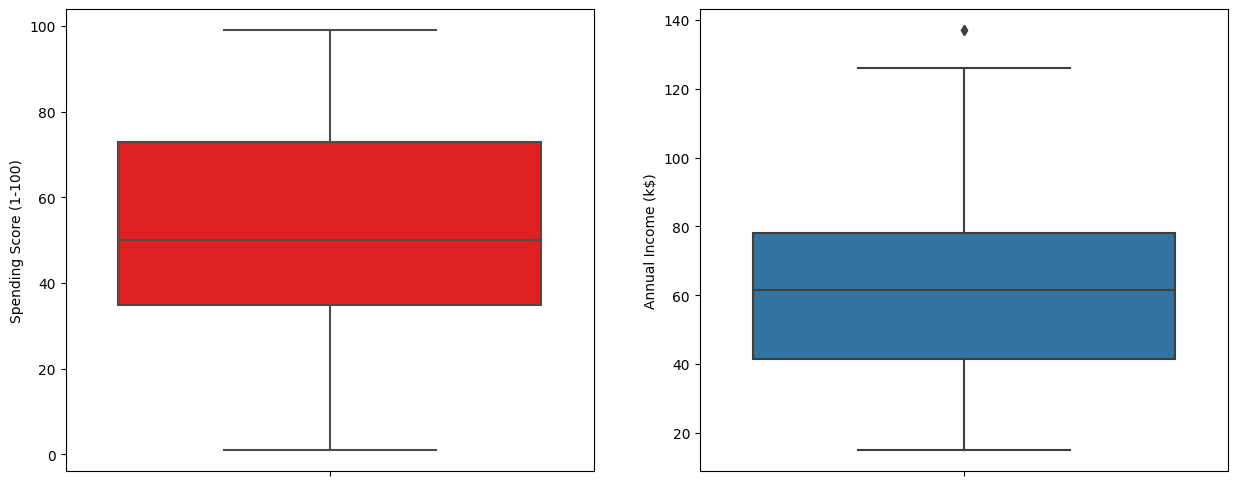

In [8]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"])
plt.show()

Es fällt auf, dass die Spannweite bei den Ausgaben größer ist als beim Einkommen. Das heißt, dass die Kundschaft hinsichtlich des Einkommens größere Homogenität aufweist als im Hinblick auf das Einkaufsverhalten.

Weiterhin verschaffen wir uns einen Überblick über die Geschlechterverteilung im Datensatz.

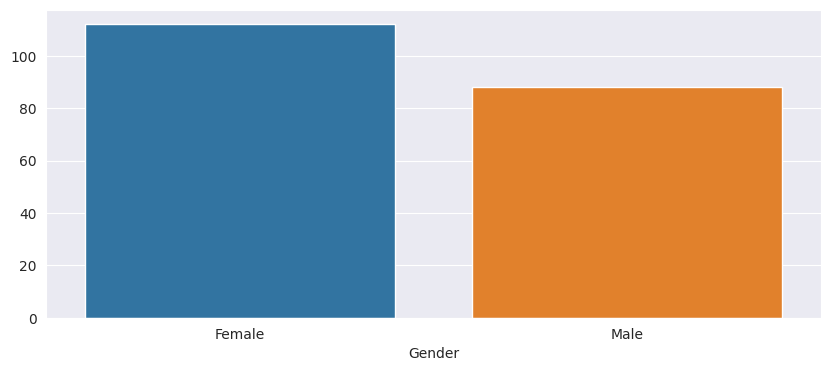

In [9]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

Der Datensatz enthält mehr Beobachtungen über Frauen als über Männer.

Weiterhin erstellen wir ein Säulendiagramm zu Klassen von Ausgaben auf Basis des Index.

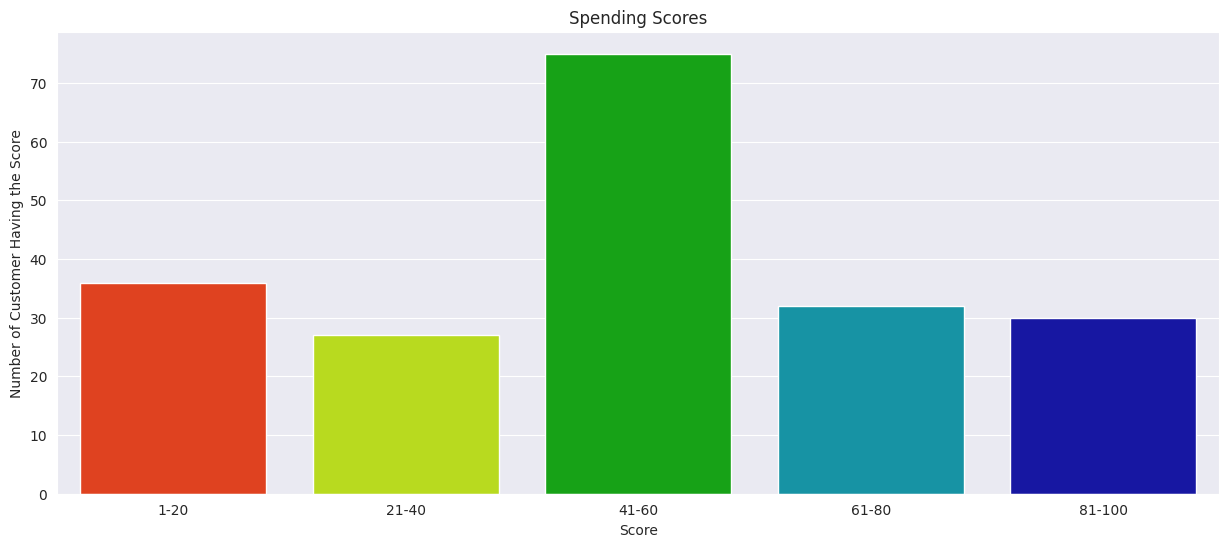

In [10]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

Außerdem betrachten wir die Verteilung der Beobachtungen über unterschiedliche Einkommensklassen.

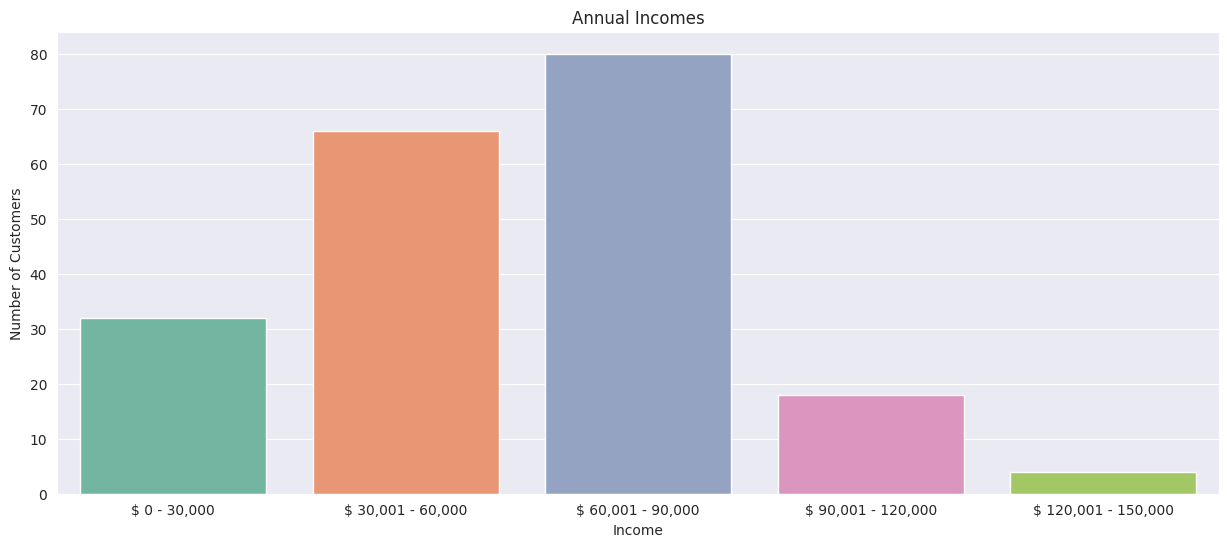

In [30]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customers")
plt.show()

Wir wollen nun mittels des unsupervised learning "k-means" Algorithmus herausfinden, wie viele Cluster sich für die Kundendaten identifizieren lassen. Die Clusteranalyse folgt dabei folgender Vorgehensweise:

- Spannweite für Anzahl Cluster k bestimmen
- k zufällige Punkte aus dem Sample als Schwerpunkte/Centroide indentifizieren
- Zuordnung der Datenpunkte zu den Schwerpunkten, an denen sie am nächsten dran sind
- Neuberechnung der Schwerpunkte der entstandenen Cluster
- Wiederholung dieser Schritte drei bis vier mal


Für jedes k führen wir eine k-means-Analyse durch und verwenden das "inertia" Attribut, um die Summe der quadrierten Abstände zum Centroid für die Beobachtungen zu ermitteln.

Anmerkungen zur Durchführung der K-Means Clusteranalyse:

- init (default as k-means++): Startet mit zufälliger Anzahl an Centroiden, die einen möglichst großen Abstand zueinander haben.
- n_init (default as 10): Anzahl an Interationen durch K-Means-Algorithmus, um finales Modell mit geringster Summe der quadrierten Distanzen zum Centroid zu identifizieren
- max_iter (default as 300): Maximale Anzahl der Läufe pro Iteration.  
- tol (default as 1e-04): Konvergenzniveau für Algorithmus. Ist Fehlerwert größer als Toleranz, wird der Algorithmus so lange angewendet, bis er unter Schwellenwert liegt. Dies impliziert Konvergenz.
- n_clusters: Anzahl an Cluster (hier 1-15)

In [28]:
from sklearn.cluster import KMeans

In [29]:
wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_) #WCSS within cluster sum of squares

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/hom

Mit steigendem k nähert sich die Summe der quadrierten Distanzen 0. Würden wir k maximieren und gleich n setzen (mit n = Anzahl Beobachtungen), dann würde jede Beobachtung ein individuelles Cluster darstellen.

Nachfolgend erstellt Ihr einen Elbow-Plot für die Summe der quadrierten Distanzen zum Centroid für unterschiedliche k (1-15). Der "Ellbogen" stellt das optimale k dar.


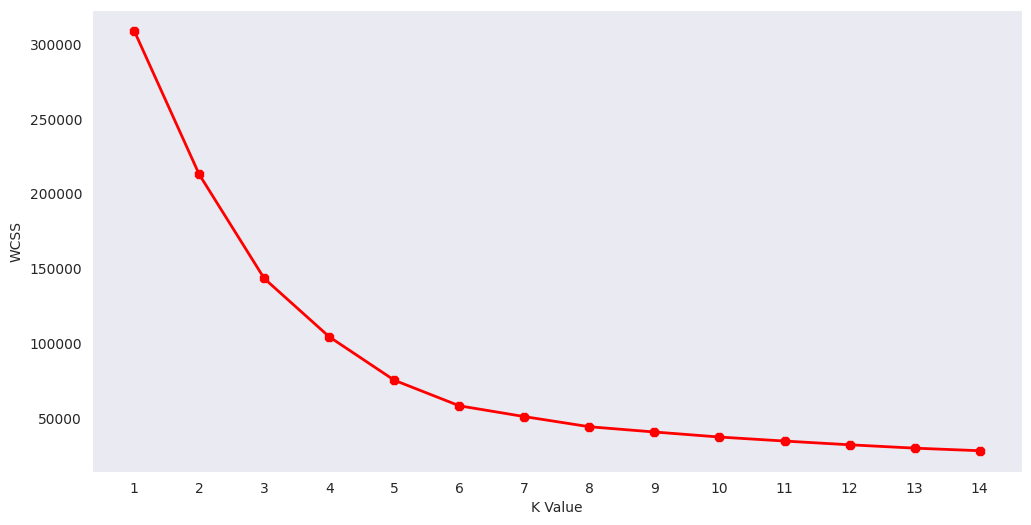

In [13]:
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,15),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,15,1))
plt.ylabel("WCSS")
plt.show()

Die Bestimmung des optimalen k ist in diesem Fall nicht ganz eindeutig möglich. Aufgrund der Steigungsänderung bei k=5 entscheiden wir uns für diese Anzahl an Clustern. Für diese Anzahl entscheiden wir uns, da die Differenz in der Summe der quadrierten Abstände von da ab mit jedem zusätzlichem Cluster nur noch geringfügig abnimmt. D.h. mit weiteren Clustern ist der Qualitätszuwachs nur noch gering bei abnehmender Verallgemeinerbarkeit.

In [14]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
pip install jupyterlab

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install npm

Für die Visualisierung unserer Cluster-Lösung importieren wir weitere Packages.

Weiterhin müssen wir Erweiterungen in SageMaker Studio Lab freischalten, um die Plotly Bibliothek zu nutzen:
1. Settings
2. Enable Extensions Manager
3. Installiere "jupyter-chart-editor"
4. Ausführen des Skripts: "./aws_studio_setup.sh" durch:
    a. chmod +x aws_studio_setup.sh
    b. ./aws_studio_setup.sh
5. Auswahl bei Extensions (Puzzle-Zeichen links): Install -> juRebuild bei jupyter-chart-editor 

(Quelle: https://austinlasseter.medium.com/how-to-display-plotly-visualizations-in-amazon-sagemaker-studio-lab-ec9a86c319bb)

In [23]:
import plotly.graph_objs as go
import plotly.express as px

Nun speichern wir die Achsenbeschreibung in einer Variable. Sie wird weiter unten bei go.Scatter3d verwendet.

In [25]:
Scene = dict(xaxis = dict(title  = 'Age -->'),yaxis = dict(title  = 'Spending Score--->'),zaxis = dict(title  = 'Annual Income-->'))

Anschließend wenden wir die .values Funktion aus Pandas auf die vorher analysierten Features an. Damit werden die Features in ein ein-dimensionales Numpy-Array überführt, damit die Visualisierung mit dieser Zahlenreihe arbeiten kann. Die "Tabellenform" des df wird dabei entfernt.

In [26]:
x = df[['Age','Annual Income (k$)','Spending Score (1-100)']].values

Es folgt die Visualisierung der Clusterlösung.

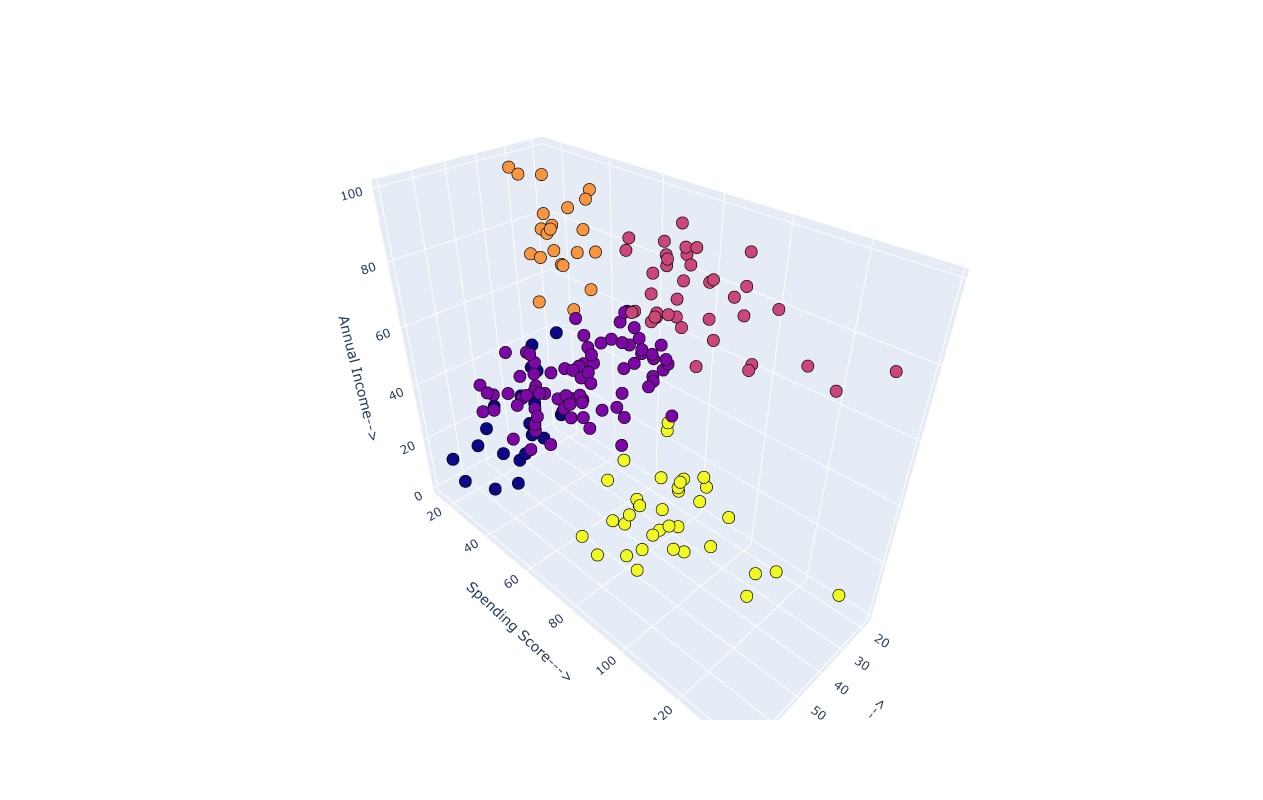

In [27]:
labels = km.labels_
trace = go.Scatter3d(x=x[:, 0], y=x[:, 1], z=x[:, 2], mode='markers',marker=dict(color = labels, size= 7, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [ ]:
fig

Güte der Lösung:

Sind die jeweils zu einem Cluster gehörigen Punkte gebündelt?

Frage zur Interpretation:

Was würdet Ihr aus den Daten schließen?
- Verstärkt Bioprodukte anbieten?
- Verstärkt frische Waren anbieten?
- Verstärkt Kinderspielzeug anbieten?
- Online oder offline werben?

- Mehr Parkplätze für Autos bauen?
- Mehr Ladesäulen installieren?
- Mehr Fahrradabstellplätze schaffen?
- Die ÖPNV-Anbindung verbessern?

Quelle: https://towardsdatascience.com/customer-segmentation-using-k-means-clustering-d33964f238c3